<a href="https://colab.research.google.com/github/Prathamesh-Shanbhag/Computer-Vision-Project/blob/cv_project/ComputerVisionProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center><h1> <b> Object Detection Using YOLO <b> </h1></center>

Mounting Drive Folder

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [25]:
%cd "/content/drive/MyDrive/ColabNotebooks/YOLO_Model_Test"
!ls

/content/drive/MyDrive/ColabNotebooks/YOLO_Model_Test
 config.yaml  'Copy of sample_0013_131.jpg'   runs   yolov8m.pt   yolov8n.pt   yolov8s.pt


Extracting Frames from video dataset

In [ ]:
import cv2
import os

# Function to extract frames from a video
def extract_frames_for_yolo(video_folder, output_folder):
    # Create output folder if it doesn't exist
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    # Iterate through all video files
    for video_filename in os.listdir(video_folder):
        if video_filename.endswith('.avi'):
            video_path = os.path.join(video_folder, video_filename)
            video_name = os.path.splitext(video_filename)[0]

            # Create subfolder for each video
            video_output_folder = os.path.join(output_folder, video_name)
            if not os.path.exists(video_output_folder):
                os.makedirs(video_output_folder)

            # Open the video file
            cap = cv2.VideoCapture(video_path)
            frame_count = 0

            # Read until video is completed
            while cap.isOpened():
                # Capture frame-by-frame
                ret, frame = cap.read()

                if ret:
                    # Save the frame
                    frame_path = os.path.join(video_output_folder, f"{video_name}_{frame_count}.jpg")
                    cv2.imwrite(frame_path, frame)

                    # Save annotation file
                    annotation_path = os.path.join(video_output_folder, f"{video_name}_{frame_count}.txt")
                    with open(annotation_path, "w") as file:
                        file.write("")

                    frame_count += 1
                else:
                    break

            # Release the video capture object
            cap.release()

# Example usage
video_folder = "/content/drive/MyDrive/ColabNotebooks/input_videos"
output_folder = "/content/drive/MyDrive/ColabNotebooks/input_videos/extracted_frames_yolo"
extract_frames_for_yolo(video_folder, output_folder)


Importing required Libraries

# Dataset Description






## Heirarchy of Folders correction

Defining paths to train and test folders.



The train and test folders have all the images and labels together.

But for YOLO, the directories should be in:

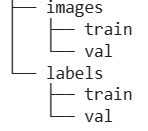


Making directories according to above struture of folders

Copy XML files and jpg files from the train folder to the folders created.

Visualizing somme pictures from the dataset

# Custom object detection using YOLO

First install and import

In [2]:
%pip install ultralytics
import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.1.27 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 29.3/78.2 GB disk)


In [47]:
from ultralytics import YOLO

## Training YOLO

We are going to select small pretrained (on COCO dataset) model of YOLOv8

In [48]:
model = YOLO('yolov8m.pt') # pretrained model

The detailed architecture of the model can be seen from:


In [ ]:
model

In [50]:
%%writefile config.yaml
path: /content/drive/MyDrive/ColabNotebooks/New_Dataset
train: /content/drive/MyDrive/ColabNotebooks/New_Dataset/train
test: /content/drive/MyDrive/ColabNotebooks/New_Dataset/test
val: /content/drive/MyDrive/ColabNotebooks/New_Dataset/valid

# Classes
nc: 2

# Class names
# replace all class names with your own classes' names
names:
  0: People_Leaving
  1: People_Entering

Overwriting config.yaml


Please look at [Yolo train Docs](https://docs.ultralytics.com/modes/train/#train-settings) for hyperparameters for model tuning and configuration, e.g. lr0, imgsz, model etc.

In [51]:
model.train(data="config.yaml",epochs=10,patience=5,batch=8, lr0=0.0005,imgsz=640)

Ultralytics YOLOv8.1.27 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8m.pt, data=config.yaml, epochs=10, time=None, patience=5, batch=8, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train9, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True, line_

train: Scanning /content/drive/MyDrive/ColabNotebooks/New_Dataset/train/labels.cache... 22 images, 0 backgrounds, 0 corrupt: 100%|██████████| 22/22 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))



val: Scanning /content/drive/MyDrive/ColabNotebooks/New_Dataset/valid/labels.cache... 7 images, 0 backgrounds, 0 corrupt: 100%|██████████| 7/7 [00:00<?, ?it/s]


Plotting labels to runs/detect/train9/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.0005' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 77 weight(decay=0.0), 84 weight(decay=0.0005), 83 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train9
Starting training for 10 epochs...
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/10      4.74G      1.202      4.151      1.593         14        640: 100%|██████████| 3/3 [00:01<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.46it/s]

                   all          7         23     0.0578      0.154     0.0827     0.0527



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/10       4.7G      1.118      3.879      1.511         12        640: 100%|██████████| 3/3 [00:01<00:00,  2.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.82it/s]

                   all          7         23      0.513      0.481      0.429      0.321



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/10      4.94G      1.158      3.138       1.55         13        640: 100%|██████████| 3/3 [00:00<00:00,  3.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.13it/s]

                   all          7         23      0.495      0.619      0.463      0.334



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/10      4.63G      1.054      2.501      1.443         13        640: 100%|██████████| 3/3 [00:00<00:00,  3.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.21it/s]


                   all          7         23      0.303      0.646      0.304      0.137

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/10       4.6G     0.9923      2.379      1.389         15        640: 100%|██████████| 3/3 [00:00<00:00,  3.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.29it/s]

                   all          7         23      0.358      0.419      0.236      0.126



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/10      4.62G     0.7443       2.07      1.207         10        640: 100%|██████████| 3/3 [00:00<00:00,  3.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.62it/s]

                   all          7         23      0.434      0.454       0.35        0.2



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/10      4.62G     0.7542      1.947      1.245         17        640: 100%|██████████| 3/3 [00:00<00:00,  3.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.08it/s]


                   all          7         23      0.463      0.461      0.416      0.248

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/10      4.61G     0.6919      1.619      1.133         14        640: 100%|██████████| 3/3 [00:00<00:00,  3.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.79it/s]

                   all          7         23       0.61      0.542       0.57      0.364



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/10      4.61G     0.6274      1.563      1.103         11        640: 100%|██████████| 3/3 [00:00<00:00,  3.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.60it/s]

                   all          7         23      0.696      0.519       0.58      0.378



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/10      4.61G     0.6671      1.533       1.11         15        640: 100%|██████████| 3/3 [00:00<00:00,  3.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.99it/s]

                   all          7         23      0.665      0.569      0.602        0.4



10 epochs completed in 0.026 hours.
Optimizer stripped from runs/detect/train9/weights/last.pt, 52.0MB
Optimizer stripped from runs/detect/train9/weights/best.pt, 52.0MB

Validating runs/detect/train9/weights/best.pt...
Ultralytics YOLOv8.1.27 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25840918 parameters, 0 gradients, 78.7 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.58it/s]


                   all          7         23      0.665      0.569      0.602      0.399
        People_Leaving          7         10      0.806        0.6      0.706      0.471
       People_Entering          7         13      0.524      0.538      0.498      0.328
Speed: 0.2ms preprocess, 10.5ms inference, 0.0ms loss, 3.1ms postprocess per image
Results saved to runs/detect/train9


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7dcc3e07d720>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.04804

## Evaluation Metrics

[This](https://docs.ultralytics.com/guides/yolo-performance-metrics/) is a very good detailed explanation of different perfromance metrics in YOLO.

**Choosing the Right Metrics**

Choosing the right metrics to evaluate often depends on the specific application.

- mAP: Suitable for a broad assessment of model performance.

- IoU: Essential when precise object location is crucial.

- Precision: Important when minimizing false detections is a priority.

- Recall: Vital when it's important to detect every instance of an object.

- F1 Score: Useful when a balance between precision and recall is needed.


In [53]:
model= YOLO("/content/drive/MyDrive/ColabNotebooks/YOLO_Model_Test/runs/detect/train9/weights/best.pt")
metrics = model.val()  # no arguments needed, dataset and settings remembered
metrics.box.map    # map50-95
metrics.box.map50  # map50
metrics.box.map75  # map75
metrics.box.maps   # a list contains map50-95 of each category
metrics.box.mp    # P
metrics.box.mr    # R

Ultralytics YOLOv8.1.27 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25840918 parameters, 0 gradients, 78.7 GFLOPs


val: Scanning /content/drive/MyDrive/ColabNotebooks/New_Dataset/valid/labels.cache... 7 images, 0 backgrounds, 0 corrupt: 100%|██████████| 7/7 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.27it/s]


                   all          7         23      0.664      0.569      0.601      0.397
        People_Leaving          7         10      0.807        0.6      0.706      0.472
       People_Entering          7         13      0.522      0.538      0.497      0.323
Speed: 0.3ms preprocess, 27.9ms inference, 0.0ms loss, 3.3ms postprocess per image
Results saved to runs/detect/val13


0.5692307692307692

Showing confusion matrix, that is already stored in detect/train folder

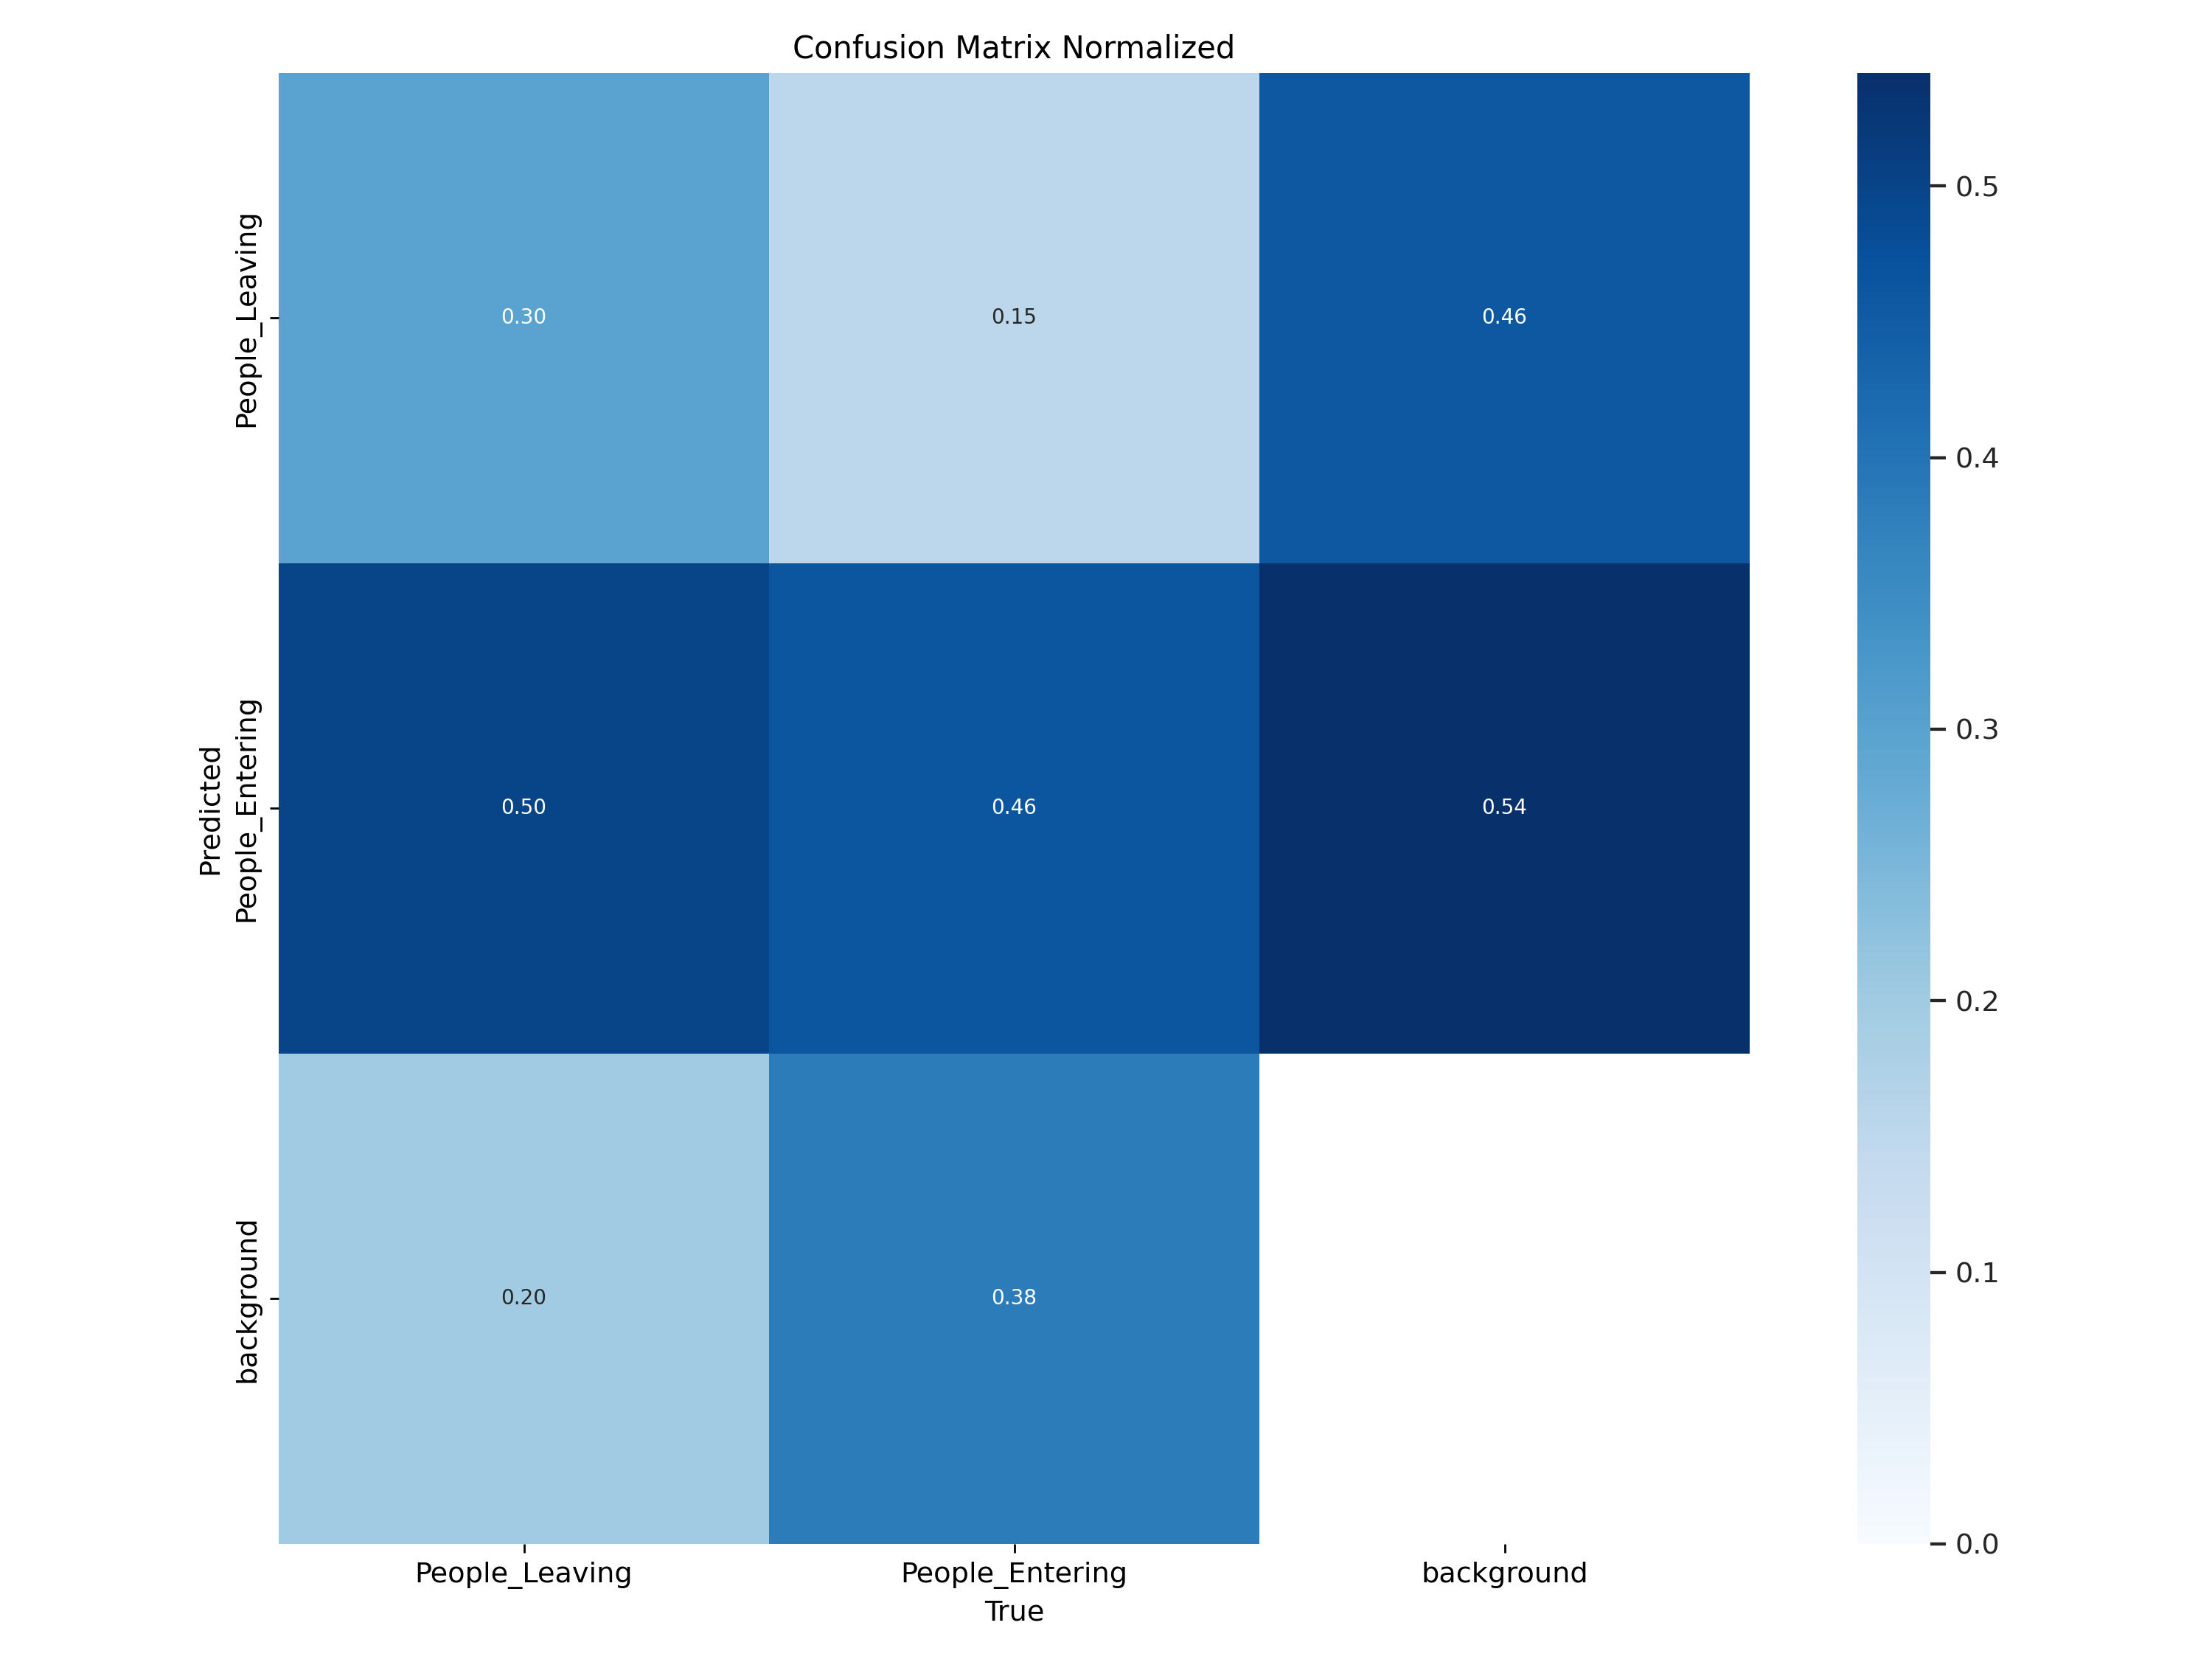

In [54]:
%matplotlib inline
from PIL import Image

Image.open('/content/drive/MyDrive/ColabNotebooks/YOLO_Model_Test/runs/detect/val13/confusion_matrix_normalized.png')

In [55]:
results=model('/content/drive/MyDrive/ColabNotebooks/YOLO_Model_Test/Copy of sample_0013_131.jpg', save=True)
#results
for r in results:
    print(r.probs)  # print the Probs object containing the detected class probabilities



image 1/1 /content/drive/MyDrive/ColabNotebooks/YOLO_Model_Test/Copy of sample_0013_131.jpg: 480x640 2 People_Leavings, 2 People_Enterings, 29.3ms
Speed: 2.7ms preprocess, 29.3ms inference, 1.8ms postprocess per image at shape (1, 3, 480, 640)
Results saved to runs/detect/predict12
None


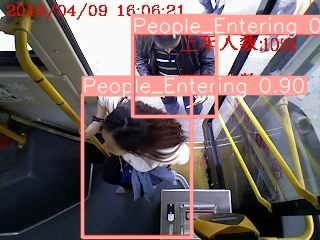

In [56]:
# SHOW THE IMAGE STORED
%matplotlib inline
from PIL import Image

Image.open('/content/drive/MyDrive/ColabNotebooks/YOLO_Model_Test/runs/detect/predict12/Copy of sample_0013_131.jpg')

##Prediction with a different model?

In [33]:
model = YOLO('yolov8n.pt')  # load a custom model

# Predict with the model with any image from internet?
results = model('/content/drive/MyDrive/ColabNotebooks/YOLO_Model_Test/Copy of sample_0013_131.jpg', save=True)



image 1/1 /content/drive/MyDrive/ColabNotebooks/YOLO_Model_Test/Copy of sample_0013_131.jpg: 480x640 2 persons, 1 dog, 110.0ms
Speed: 2.5ms preprocess, 110.0ms inference, 1.7ms postprocess per image at shape (1, 3, 480, 640)
Results saved to runs/detect/predict9


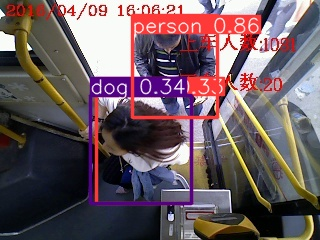

In [35]:
# SHOW THE IMAGE STORED
%matplotlib inline
from PIL import Image

Image.open('/content/drive/MyDrive/ColabNotebooks/YOLO_Model_Test/runs/detect/predict9/Copy of sample_0013_131.jpg')